In [1]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.0.1"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.1"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [24]:
el_dist = read.csv("../data/features/dist.csv")
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 33856 
    missing edges= 0 
    non-missing edges= 33856 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/features/dip_exhange_clean.csv")
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 8295 
    missing edges= 0 
    non-missing edges= 8295 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el = read.csv("../data/edgelist_2011.csv")
nl = read.csv("../data/nodelist_2011.csv")

In [5]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$log_area <- log(nl$area)

In [6]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3774 
    missing edges= 0 
    non-missing edges= 3774 

 Vertex attribute names: 
    area colonizer continent country_iso3 gdp_growth gdp_us_dollar inflation_rate landlocked langoff_1 log_area vertex.names 

 Edge attribute names not shown 

In [34]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodeocov("gdp_us_dollar") +
                        absdiff("gdp_us_dollar") +
                        nodeocov("inflation_rate") +
                        absdiff("inflation_rate") +
                        nodeocov("gdp_growth") +
                        absdiff("gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
#                         edgecov(dist_net, "log_dist") +
                        edgecov(diplomatic_exchange_net)
#                         nodecov("log_area")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.4016.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.1589.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [35]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodeocov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodeocov("inflation_rate") + absdiff("inflation_rate") + 
    nodeocov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer") + 
    nodematch("continent") + nodematch("landlocked") + nodematch("langoff_1") + 
    edgecov(diplomatic_exchange_net))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                                  Estimate Std. Error MCMC % z value Pr(>|z|)
edges                           -9.2833888  0.2354729      0 -39.424  < 1e-04
mutual                           0.5661528  0.0698840      0   8.101  < 1e-04
nodeocov.gdp_us_dollar           0.3092291  0.0096836      0  31.933  < 1e-04
absdiff.gdp_us_dollar            0.0348722  0.0083670      0   4.168  < 1e-04
nodeocov.inflation_rate         -0.0098479  0.0037742      0  -2.609  0.00907
absdiff.inflation_rate           0.0040114  0.0032086      0   1.250  0.21122
nodeocov.gdp_growth              0.000393

In [36]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [37]:
gof


Goodness-of-fit for model statistics 

                                     obs      min     mean      max MC p-value
edges                            3773.00  3668.00  3794.63  3955.00       0.70
mutual                            323.00   286.00   328.19   377.00       0.80
nodeocov.gdp_us_dollar          94402.96 91764.04 94938.90 99058.11       0.72
absdiff.gdp_us_dollar           11771.28 11484.93 11864.12 12500.78       0.70
nodeocov.inflation_rate         23031.02 22022.38 23095.04 24088.02       0.84
absdiff.inflation_rate          19463.59 18453.11 19571.11 20679.35       0.82
nodeocov.gdp_growth             14750.81 13964.27 14785.95 15585.45       0.92
absdiff.gdp_growth              16677.82 15759.03 16861.27 18050.86       0.74
nodematch.colonizer              1348.00  1305.00  1357.03  1423.00       0.84
nodematch.continent               555.00   491.00   555.59   603.00       0.96
nodematch.landlocked             2383.00  2268.00  2395.83  2525.00       0.82
nodematch.la

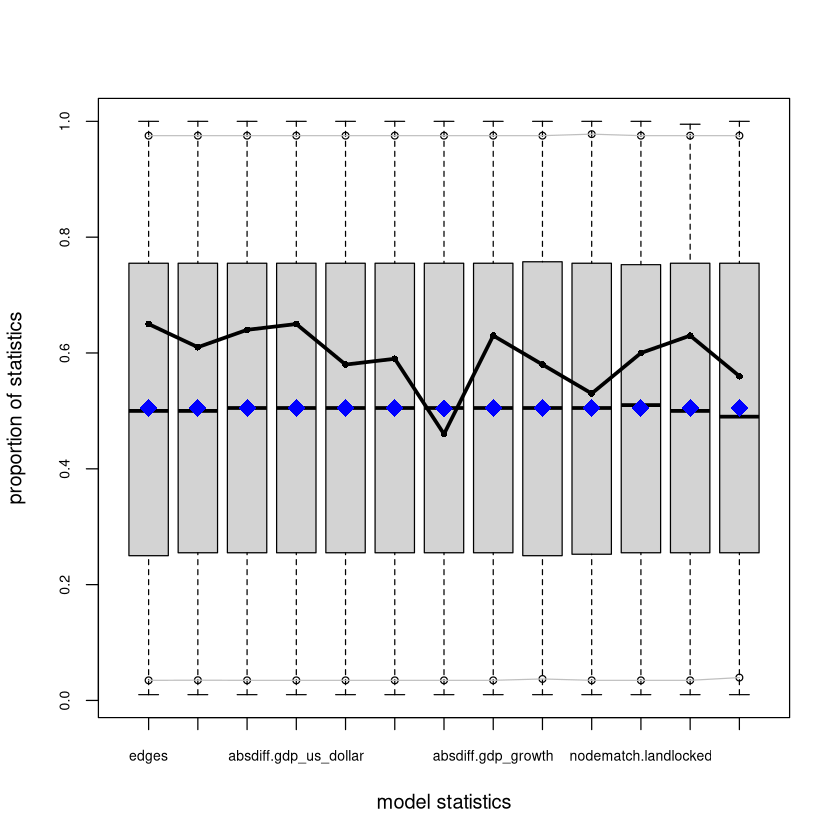

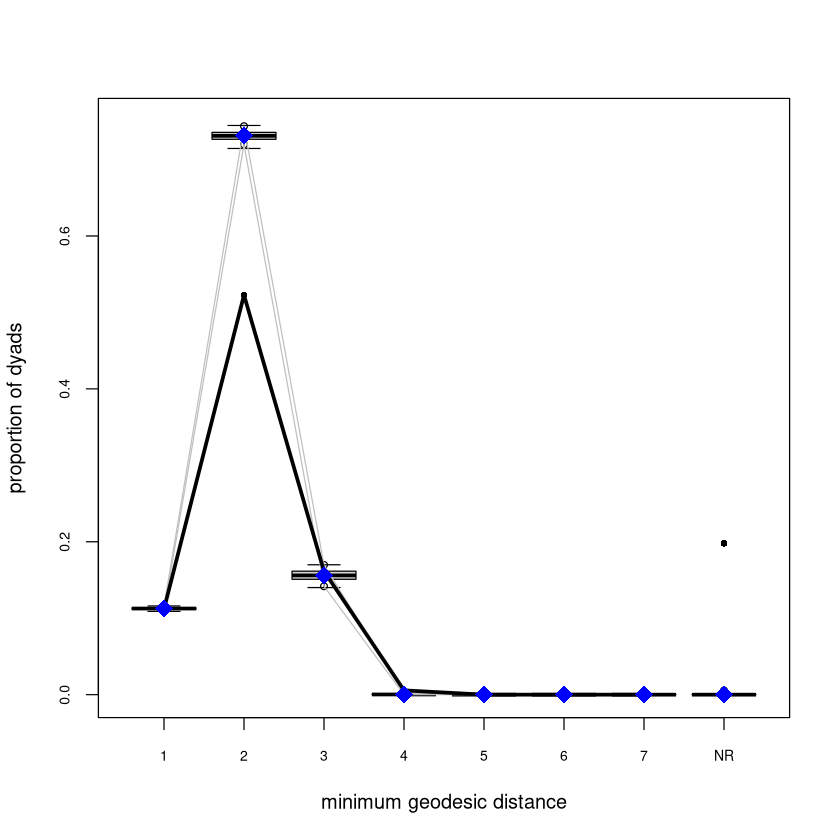

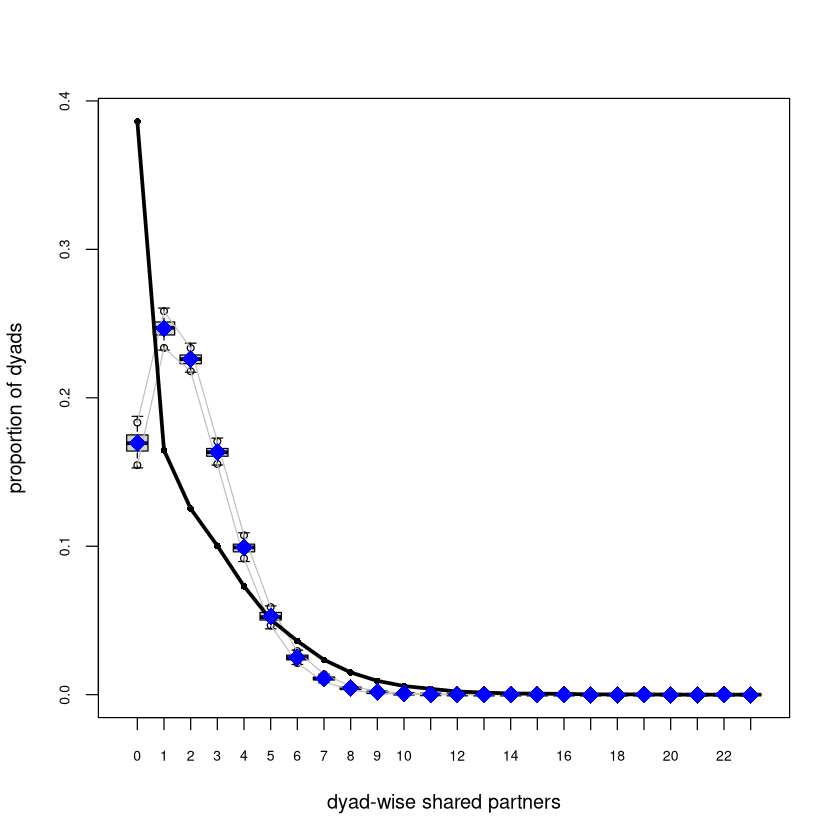

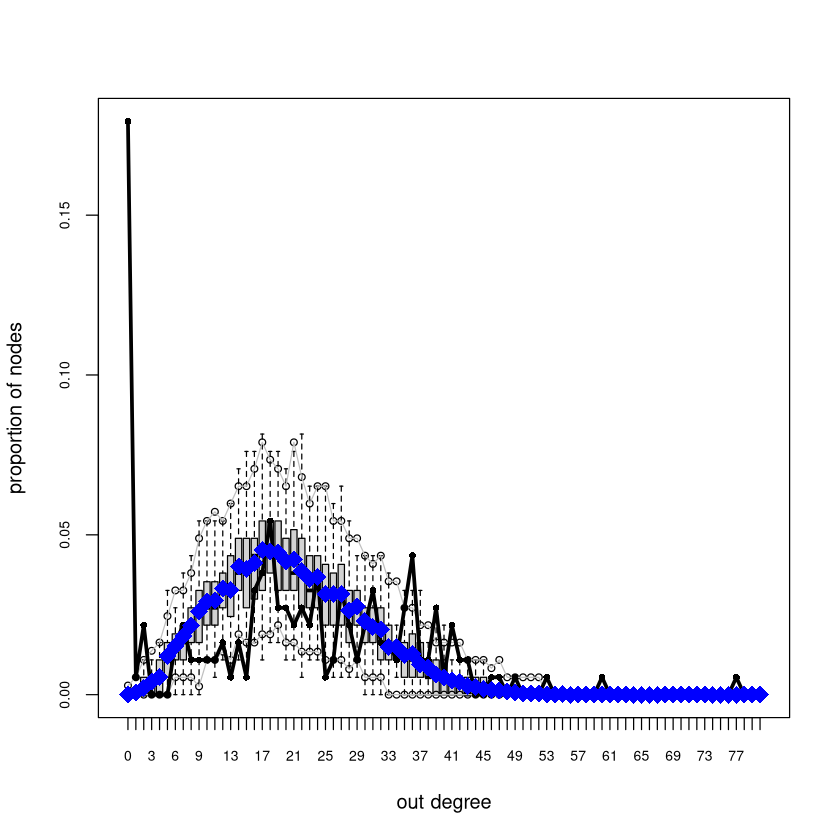

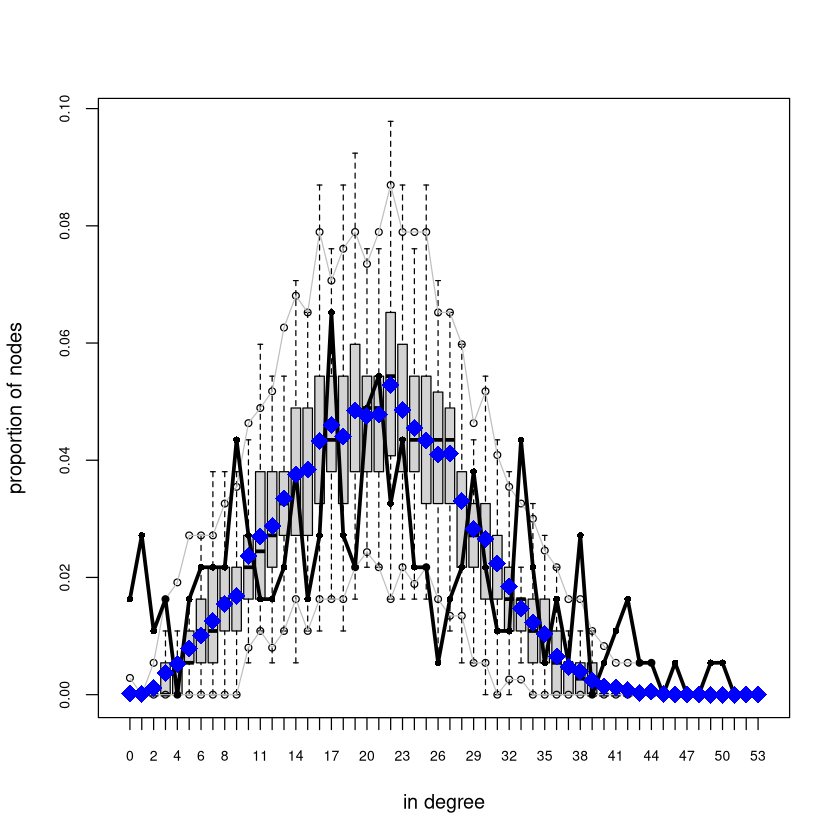

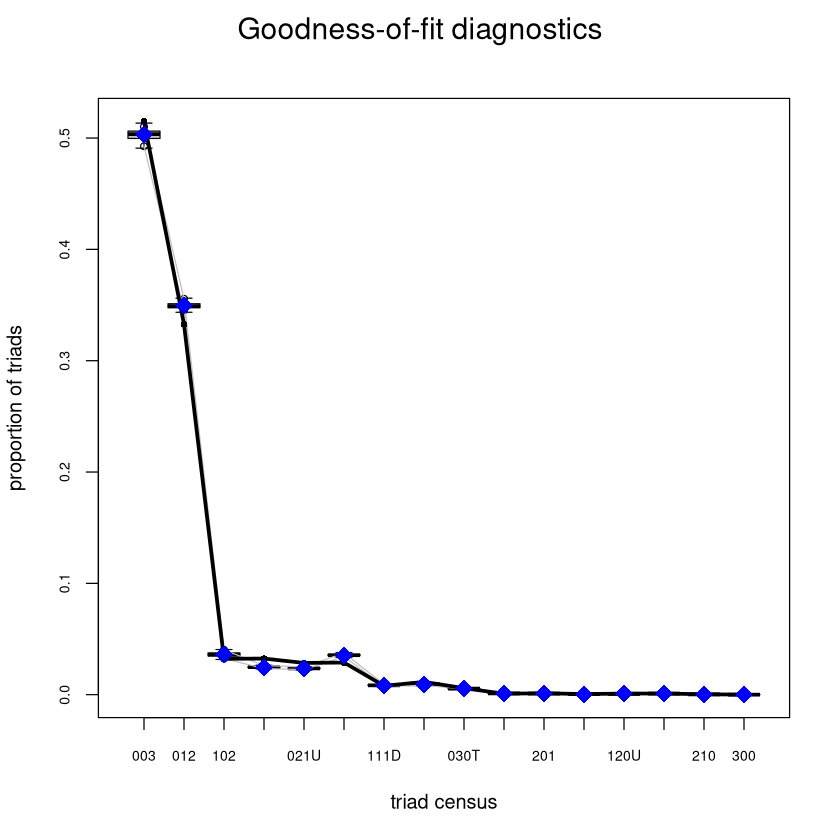

In [38]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                      Mean        SD  Naive SE Time-series SE
edges                           -1.081e+01     57.06    0.8916      3.982e+00
mutual                           3.621e-01     18.22    0.2848      1.176e+00
nodeocov.gdp_us_dollar          -2.878e+02   1408.22   22.0035      9.980e+01
absdiff.gdp_us_dollar           -6.619e+01    202.33    3.1615      1.495e+01
nodeocov.inflation_rate         -1.569e+02    462.22    7.2222      2.966e+01
absdiff.inflation_rate          -1.310e+02    483.88    7.5606      3.429e+01
nodeocov.gdp_growth             -7.996e+01    369.22    5.7691      2.514e+01
absdiff.gdp_growth              -3.886e+01    394.75    6.1679      2.451e+01
nodematch.colonizer             -1.084e+01     34.76    0.5432     

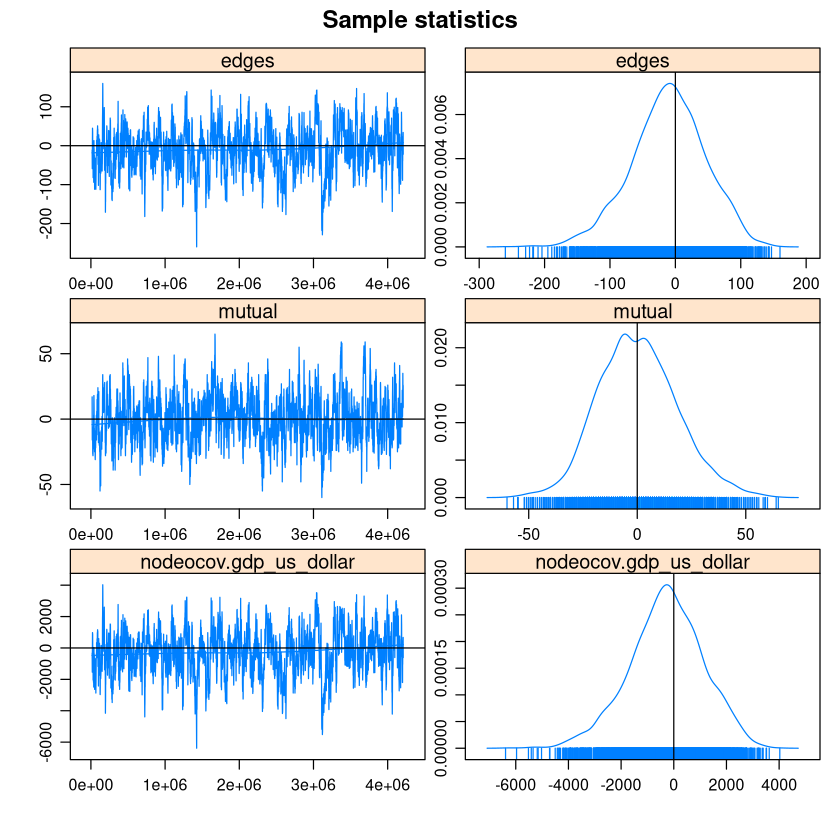

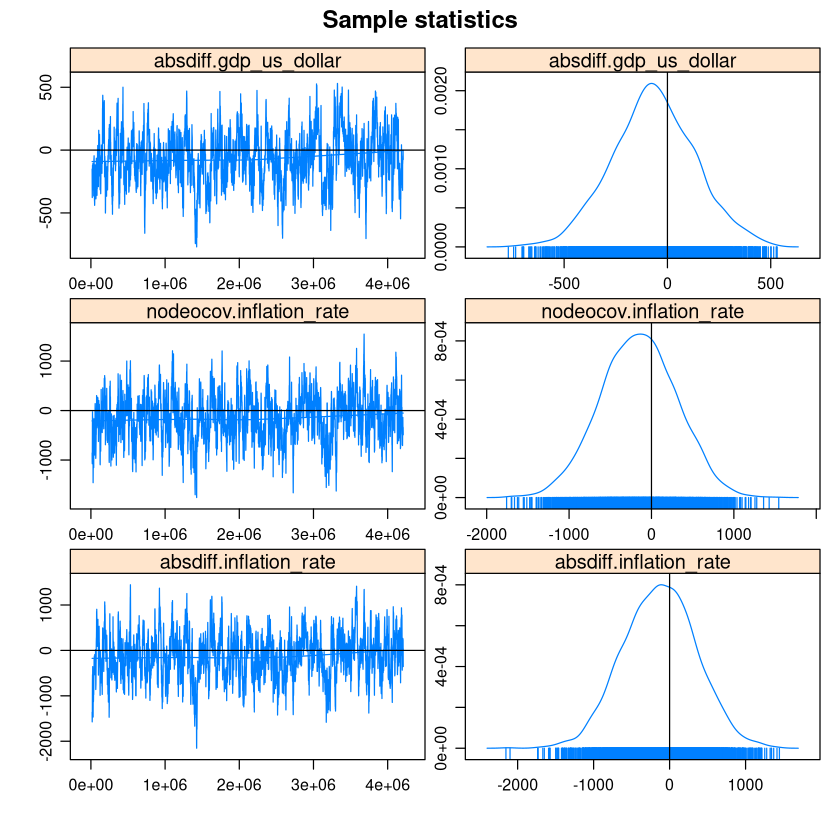

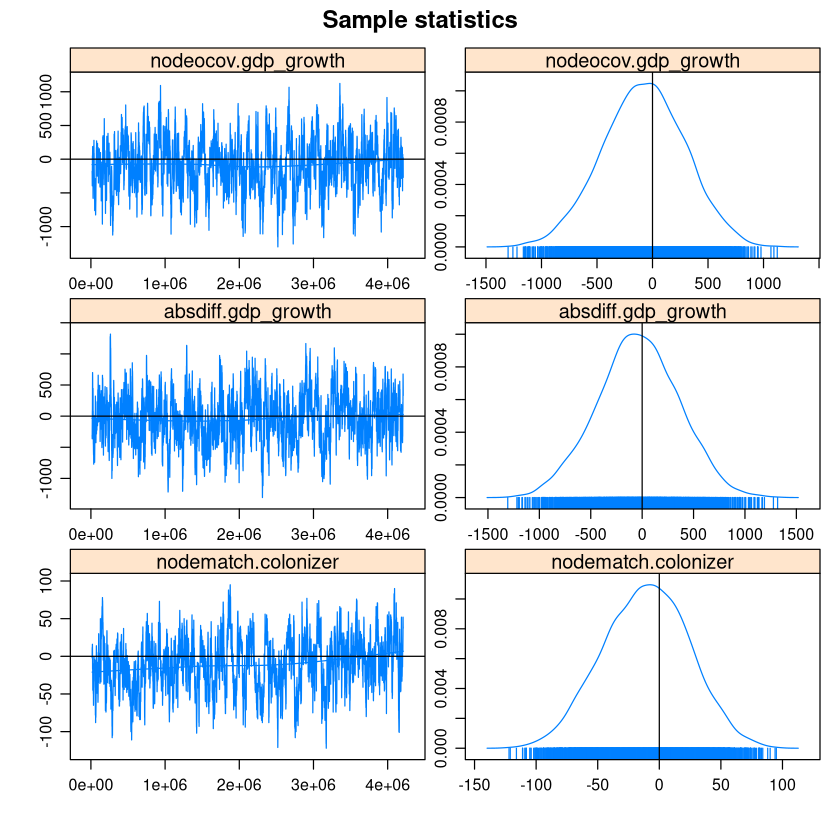

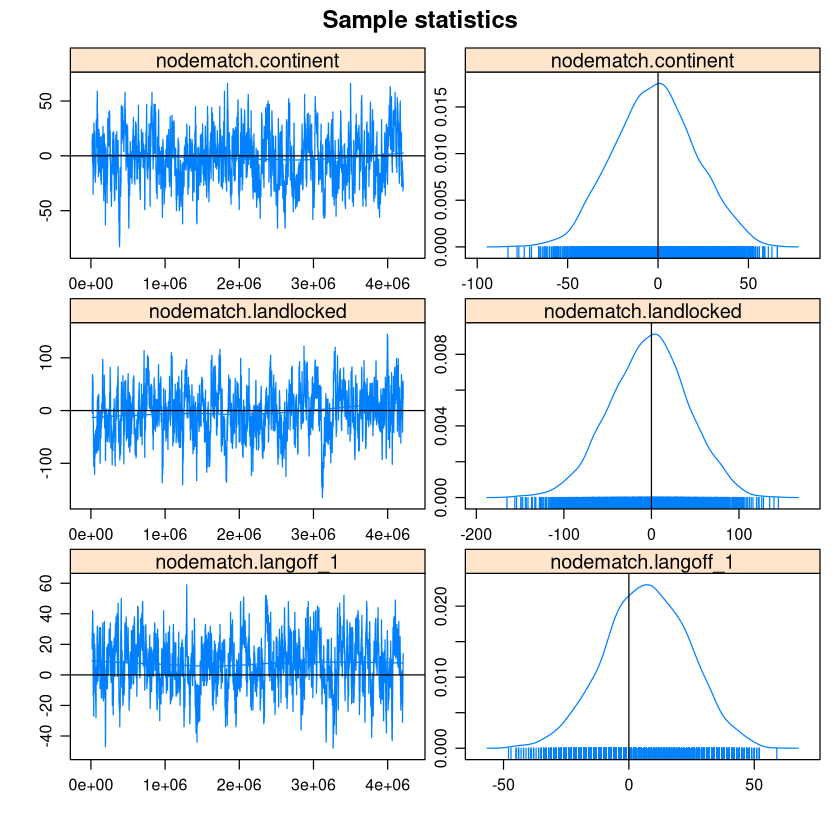


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


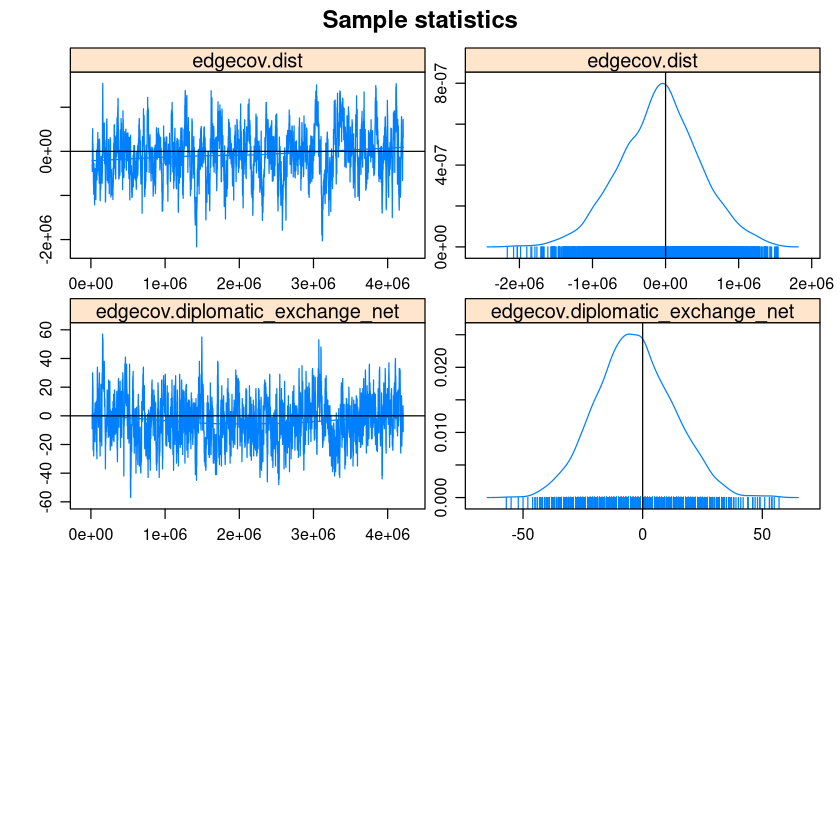

In [12]:
mcmc.diagnostics(model)